In [653]:
import PyDSTool as dst
import matplotlib.pyplot as plt
from PyDSTool.Toolbox import phaseplane as pp

In [654]:
k_on1 = 1e5
A_01 = 1e-7
#k_on = k_on1*A_01
rho_T1 = 1e5
alpha = 3
k_off = 1e-4
q_on1 = 6.5e3
#q_on = q_on1*A_01
q_off = 4.7e-3
rho_N1 = 2.2e5
beta = 5 

A_0 = (172635*A_01*1.85e-18)/1.66e-24
rho_T = rho_T1/beta
rho_N = rho_N1/alpha
n_1 = k_on1*rho_T*(1/q_off)
n_2 = k_off/q_off
v = q_on1*(1/q_off)*rho_T
delta = rho_T/rho_N
Nr0 = ((A_01/5e-7)**2)/(0.1**2 + (A_01/5e-7)**2)
Tr0 = ((A_01/5e-7)**2)/(0.1**2 + (A_01/5e-7)**2)
C = (172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T)
mu_T = C/rho_T

In [655]:
DSargs = dst.args(name='Single Complex Model')
DSargs.pars = {'n_1' : n_1,
               'n_2' : n_2,
               'v' : v,
               'delta' : delta,
               'mu_T' : mu_T,
               'A_01' : A_01,
               'rho_T': rho_T,
               'rho_N': rho_N,
               'Tr0': Tr0,  
               'Nr0': Nr0}

DSargs.varspecs = {'T': '(A_01*n_1*(1 - T - B)*((((172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T))/rho_T) - T - (N/delta) - B)) + B - (n_2*T) -(A_01*v*(1 - N - (delta*B))*T)',
                   'N': '(A_01*v*(1 - N - (delta*B))*((((172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T))/rho_T) - T - (N/delta) - B)) + (n_2*delta*B) - N -(A_01*n_1*(1 - T - B)*N)',
                   'B': '((A_01*n_1/delta)*(1 - T - B)*N) + (A_01*v*(1 - N - (delta*B))*T) - ((n_2 + 1)*B) '}

DSargs.ics = {'T': Tr0, 'N': Nr0, 'B': 0}
DSargs.xdomain = {'T': [0, 1], 'N': [0, 1], 'B': [0, 1]}

In [656]:
DSargs.tdomain = [0.000001, 100]
ode = dst.Generator.Vode_ODEsystem(DSargs)
#traj = ode.compute('polarization')
#pts = traj.sample()

#plt.plot(np.log(pts['t']), pts['B'])
#plt.show()

In [657]:
"""plt.figure(2)
pp.plot_PP_vf(ode, 'T', 'N')#, scale_exp=-1)
fp_coord = pp.find_fixedpoints(ode, n=4, eps=1e-8)[0]
fp = pp.fixedpoint_2D(ode, dst.Point(fp_coord), eps=1e-8)
nulls_x, nulls_y = pp.find_nullclines(ode, 'T', 'N', n=3, eps=1e-8, max_step=0.1, fps=[fp_coord])
pp.plot_PP_fps(fp)
plt.plot(nulls_x[:,0], nulls_x[:,1], 'b')
plt.plot(nulls_y[:,0], nulls_y[:,1], 'g')"""

"plt.figure(2)\npp.plot_PP_vf(ode, 'T', 'N')#, scale_exp=-1)\nfp_coord = pp.find_fixedpoints(ode, n=4, eps=1e-8)[0]\nfp = pp.fixedpoint_2D(ode, dst.Point(fp_coord), eps=1e-8)\nnulls_x, nulls_y = pp.find_nullclines(ode, 'T', 'N', n=3, eps=1e-8, max_step=0.1, fps=[fp_coord])\npp.plot_PP_fps(fp)\nplt.plot(nulls_x[:,0], nulls_x[:,1], 'b')\nplt.plot(nulls_y[:,0], nulls_y[:,1], 'g')"

In [658]:
ode.set(pars = {'A_01': 1e-11})
ode.set(ics = {'T': 0.0003,
               'N': 0,
               'B': 0.0007})

PC = dst.ContClass(ode)

PCargs = dst.args(name='EQ1', type='EP-C')
PCargs.freepars = ['A_01']
PCargs.MaxNumPoints = 450
PCargs.MaxStepSize = 1e-2
PCargs.MinStepSize = 1e-20
PCargs.StepSize = 1e-4
PCargs.LocBifPoints = 'All'
PCargs.SaveEigen = True


B Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 



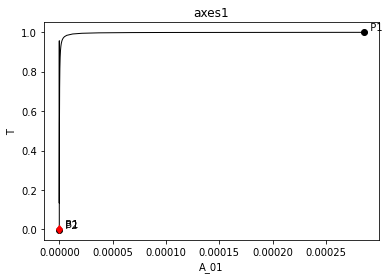

In [659]:
PC.newCurve(PCargs)
PC['EQ1'].backward()
PC.display(['A_01', 'T'], stability=True, figure=3)

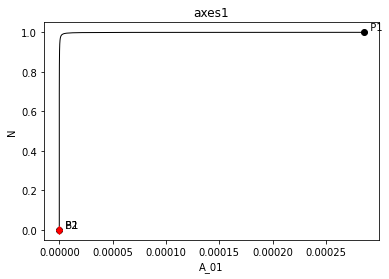

In [660]:
PC.display(['A_01', 'N'], stability=True)#, figure=3)

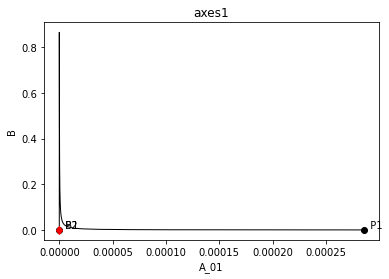

In [661]:
PC.display(['A_01', 'B'], stability=True)#, figure=3)

In [662]:
"""PCargs = dst.args(name='SN1', type='LP-C')
PCargs.initpoint    = 'EQ1:LP1'
PCargs.freepars     = ['A_01', 'delta']
PCargs.MaxStepSize  = 10
PCargs.LocBifPoints = ['CP']
PCargs.MaxNumPoints = 200
PC.newCurve(PCargs)
PC['SN1'].forward()
PC['SN1'].backward()
PC['SN1'].display(['A_01','B'], figure=4)"""

"PCargs = dst.args(name='SN1', type='LP-C')\nPCargs.initpoint    = 'EQ1:LP1'\nPCargs.freepars     = ['A_01', 'delta']\nPCargs.MaxStepSize  = 10\nPCargs.LocBifPoints = ['CP']\nPCargs.MaxNumPoints = 200\nPC.newCurve(PCargs)\nPC['SN1'].forward()\nPC['SN1'].backward()\nPC['SN1'].display(['A_01','B'], figure=4)"

In [663]:
print(PC['EQ1'].getSpecialPoint('B1'))

A_01:  2.308964705451881e-23
B:  1.1622189214657664e-21
N:  2.384292630883722e-12
T:  1.7240269763011633e-09
Labels: EP ({'data': args (
 V = {'B': -1.348259426638689e-12, 'N': -0.001382977405580762, 'T': -0.9999990436862906, 'A_01': -1.3392844393650996e-14},
 ds = 0.000743008370688,
 evals = [-0.0212766+0.j -1.0212766+0.j -1.       +0.j],
 evecs = [[-6.38647772e-13 -6.94313843e-01 -1.69323766e-09]
 [ 6.48749555e-13  1.89358321e-01 -1.00000000e+00]
 [-1.00000000e+00  6.94313843e-01  1.69324577e-09]]
), 'domain': 'inside', 'stab': 'S'})
Labels: B ({'data': args (
 X = {'B': 1.1622189214657664e-21, 'N': 2.384292630883722e-12, 'T': 1.7240269763011633e-09, 'A_01': 2.308964705451881e-23},
 V = {'B': 1.348259426638689e-12, 'N': 0.001382977405580762, 'T': 0.9999990436862906, 'A_01': 1.3392844393650996e-14}
), 'plot': No args defined, 'name': 'B1'})


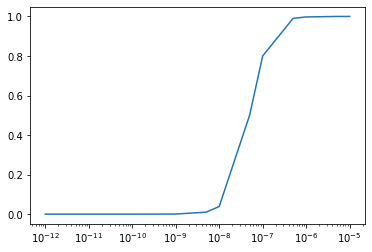

In [664]:
def hill(x):
    x = x/5e-7
    return x**2/(0.1**2 + x**2)

A0_array = [1e-12, 5e-12, 1e-11, 5e-11, 1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
list = []

for i in range(len(A0_array)):
    list.append(hill(A0_array[i]))

plt.semilogx(A0_array, list)
plt.show()